# Workshop - Censo e ingreso

En la carpeta datasets, hay 3 ficheros con información de un censo realizado en estados unidos en 1994. 
Se recoge informacion sociodemográfica junto con una columna que indica si la persona, tenía ingresos por más de 50K dolares.

Realiza una exploración, para entender los datos. 
Antes de empezar, une los ficheros adult.data y adult.test, ya que en esta ocasión se facilitó por separado, para una prueba.

https://archive.ics.uci.edu/ml/datasets/Census+Income

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

In [4]:
PATH = "/home/bigdatafutura/Sesion 03/files/adult.data"

In [5]:
colnames = ["age", "workclass", "fnlwgt","education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]

In [6]:
colnames = list(map(lambda x: x.replace("-", "_"), colnames))

In [7]:
colnames

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [8]:
df_data = pd.read_csv(PATH, header=None, names=colnames)
df_data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [9]:
PATH_TEST = PATH.replace(".data", ".test")
PATH_TEST

'/home/bigdatafutura/Sesion 03/files/adult.test'

In [10]:
df_test = pd.read_csv(PATH_TEST, header=None, names=colnames, skiprows=1)
df_test.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [11]:
print(df_data.shape, df_test.shape)

(32561, 15) (16281, 15)


In [12]:
df = df_data.append(df_test)
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [13]:
df.shape[0] == (df_data.shape[0] + df_test.shape[0])

True

In [14]:
df.isin([" ?"]).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [15]:
df["income"].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income, dtype: int64

In [16]:
df["income"].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [17]:
df["income"].replace({' <=50K': 0, ' <=50K.': 0, ' >50K' : 1, ' >50K.' : 1}, inplace=True)

In [18]:
df["income"].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [19]:
pd.crosstab(df["income"], columns="count") / df.shape[0]

col_0,count
income,
0,0.760718
1,0.239282


In [20]:
df["income"].sum()

11687

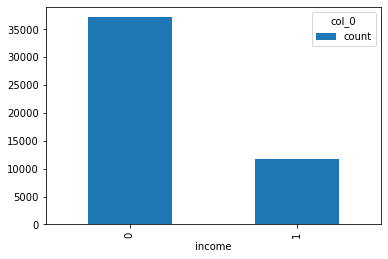

In [21]:
pd.crosstab(df["income"], columns="count").plot(kind="bar")
plt.show()

In [22]:
df.dtypes.value_counts()

object    8
int64     7
dtype: int64

In [23]:
df_cat = df.select_dtypes(["O"])

In [24]:
for col in df_cat.columns:
    print(df_cat[col].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' 

In [25]:
columns_cat = df.dtypes.index[df.dtypes == "object"]

In [26]:
columns_cat

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [27]:
"   X  ".strip()

'X'

In [28]:
df[columns_cat] = df.select_dtypes(["O"]).applymap(lambda x: x.strip())

In [29]:
df_cat = df.select_dtypes(["O"])

In [30]:
for col in df_cat.columns:
    print("?" in df_cat[col].unique())

True
False
False
True
False
False
False
True


In [31]:
df.replace({"?":np.nan}, inplace=True)

In [32]:
df_cat = df.select_dtypes(["O"])

In [33]:
df_cat.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [34]:
pd.crosstab(df["income"], df["sex"]) / df.shape[0]

sex,Female,Male
income,,
0,0.295299,0.465419
1,0.036219,0.203063


<AxesSubplot:xlabel='sex'>

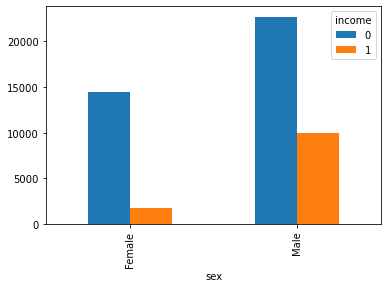

In [35]:
pd.crosstab(df["sex"], df["income"]).plot(kind="bar")

In [36]:
stat, p, dof, exp = chi2_contingency(pd.crosstab(df["income"], df["sex"]))

In [37]:
print(stat, p)

2248.847679013691 0.0


La variable workclass esta relacionada con el nivel de ingresos.


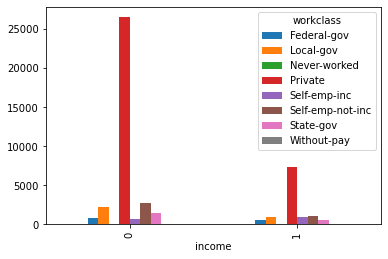

La variable education esta relacionada con el nivel de ingresos.


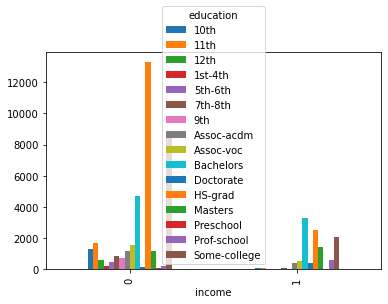

La variable marital_status esta relacionada con el nivel de ingresos.


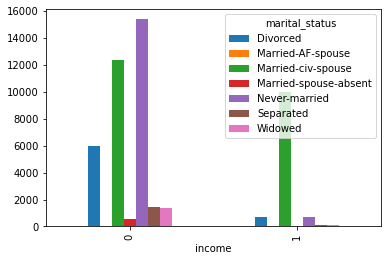

La variable occupation esta relacionada con el nivel de ingresos.


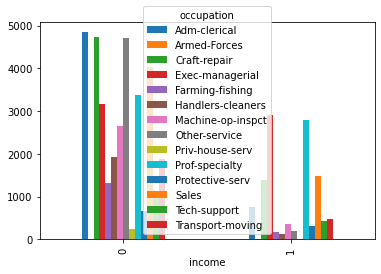

La variable relationship esta relacionada con el nivel de ingresos.


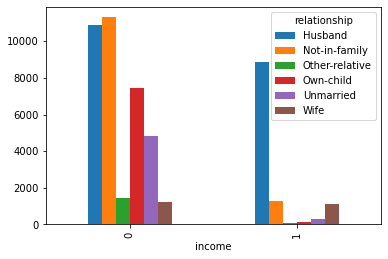

La variable race esta relacionada con el nivel de ingresos.


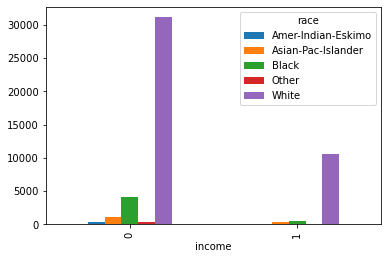

La variable sex esta relacionada con el nivel de ingresos.


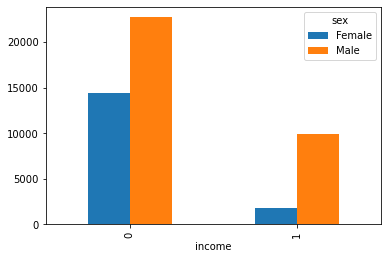

La variable native_country esta relacionada con el nivel de ingresos.


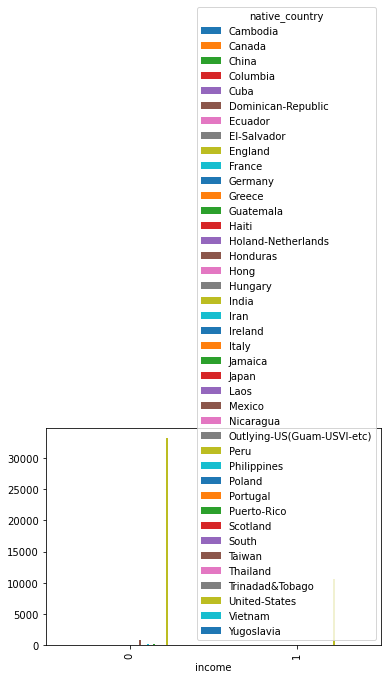

In [38]:
for col in df_cat.columns:
    stat, p, dof, exp = chi2_contingency(pd.crosstab(df["income"], df[col]))
    if p < 0.0001:
        print("La variable", col, "esta relacionada con el nivel de ingresos.")
        pd.crosstab(df["income"], df[col]).plot(kind="bar")
        plt.show()

In [39]:
len(df_cat.columns)

8

In [40]:
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [41]:
df_num = df.select_dtypes(["int64"])

In [42]:
num_out = df_num.groupby("income").mean()

In [43]:
num_out

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
income,,,,,,
0,36.872184,190039.565523,9.598493,147.010308,54.151931,38.840048
1,44.275178,188470.574570,11.602807,4042.239497,193.528964,45.452896


In [44]:
df.describe?

Signature:
df.describe(
    percentiles=None,
    include=None,
    exclude=None,
    datetime_is_numeric=False,
) -> ~FrameOrSeries
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in 

/home/bigdatafutura/anaconda3/envs/env_ml/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

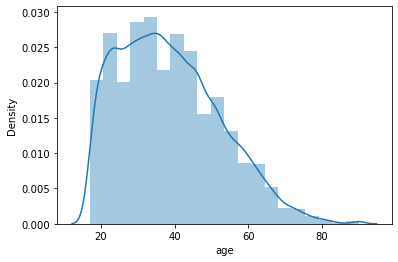

In [45]:
sns.distplot(df_num["age"], bins=20)

In [46]:
df_num["age_disc"] = pd.cut(df_num["age"], 10)

/home/bigdatafutura/anaconda3/envs/env_ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_num["age_disc"].value_counts()

(38.9, 46.2]      9157
(31.6, 38.9]      9120
(24.3, 31.6]      8686
(16.927, 24.3]    8432
(46.2, 53.5]      5965
(53.5, 60.8]      3876
(60.8, 68.1]      2456
(68.1, 75.4]       777
(75.4, 82.7]       277
(82.7, 90.0]        96
Name: age_disc, dtype: int64

In [48]:
out = df_num.groupby("age_disc")["income"].mean()

In [49]:
out

age_disc
(16.927, 24.3]    0.011029
(24.3, 31.6]      0.135275
(31.6, 38.9]      0.275877
(38.9, 46.2]      0.364093
(46.2, 53.5]      0.396144
(53.5, 60.8]      0.349587
(60.8, 68.1]      0.262215
(68.1, 75.4]      0.190476
(75.4, 82.7]      0.148014
(82.7, 90.0]      0.187500
Name: income, dtype: float64

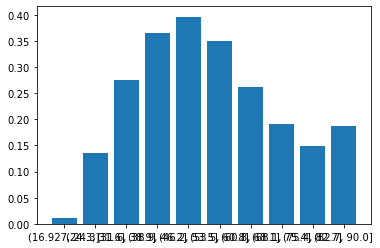

In [50]:
plt.bar(x=out.index.astype("str"),height=out.values)
plt.show()

In [51]:
df_num.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'age_disc'],
      dtype='object')

In [52]:
df_num["education_disc"] = pd.cut(df_num["education_num"], 10)

/home/bigdatafutura/anaconda3/envs/env_ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
out = df_num.groupby("education_disc")["income"].mean()

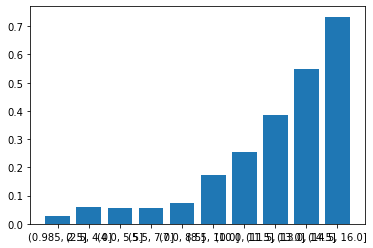

In [54]:
plt.bar(x=out.index.astype("str"),height=out.values)
plt.show()